### Step 1: Importing Related liberaries

In [3]:
# Liberaries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(123)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools
#from keras.layers.normalization import BatchNormalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

#from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

#ee

### Step 2: Uploading Data and Creating the Directory Structure

In [4]:
base_skin_dir = 'F:/Be.code/ComputerVision_CNNs_Project/datasets/'
base_skin_img = 'F:/Be.code/full/full_data_mole/'
print(base_skin_img)


F:/Be.code/full/full_data_mole/


In [5]:
skin_df = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))

In [6]:
skin_df['path'] =base_skin_img + skin_df['image_id'] +'.jpg'


In [7]:
print(skin_df['path'])

0        F:/Be.code/full/full_data_mole/ISIC_0027419.jpg
1        F:/Be.code/full/full_data_mole/ISIC_0025030.jpg
2        F:/Be.code/full/full_data_mole/ISIC_0026769.jpg
3        F:/Be.code/full/full_data_mole/ISIC_0025661.jpg
4        F:/Be.code/full/full_data_mole/ISIC_0031633.jpg
                              ...                       
10010    F:/Be.code/full/full_data_mole/ISIC_0033084.jpg
10011    F:/Be.code/full/full_data_mole/ISIC_0033550.jpg
10012    F:/Be.code/full/full_data_mole/ISIC_0033536.jpg
10013    F:/Be.code/full/full_data_mole/ISIC_0032854.jpg
10014    F:/Be.code/full/full_data_mole/ISIC_0032258.jpg
Name: path, Length: 10015, dtype: object


In [16]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [17]:
print(skin_df.head())

     lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

                                              path  
0  F:/Be.code/full/full_data_mole/ISIC_0027419.jpg  
1  F:/Be.code/full/full_data_mole/ISIC_0025030.jpg  
2  F:/Be.code/full/full_data_mole/ISIC_0026769.jpg  
3  F:/Be.code/full/full_data_mole/ISIC_0025661.jpg  
4  F:/Be.code/full/full_data_mole/ISIC_0031633.jpg  


In [18]:
print(type(skin_df['path']))

<class 'pandas.core.series.Series'>


In [9]:
print(skin_df["dx"].unique())

['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']


### Step 3: Exploring Dataset Features

<AxesSubplot:>

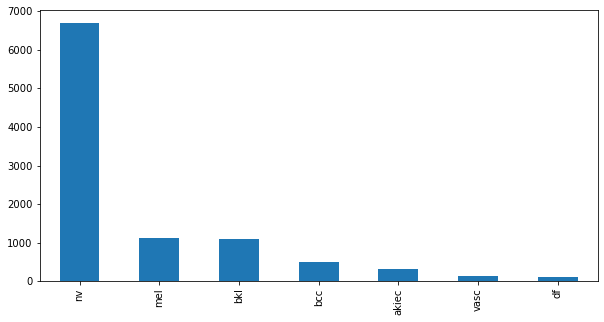

In [10]:
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
skin_df['dx'].value_counts().plot(kind='bar', ax=ax1)

<AxesSubplot:>

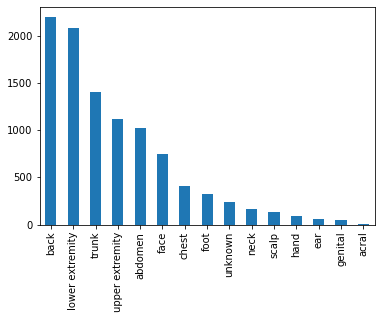

In [12]:
skin_df['localization'].value_counts().plot(kind='bar')

<AxesSubplot:>

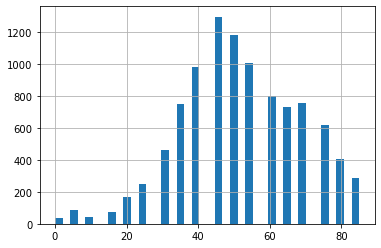

In [13]:
skin_df['age'].hist(bins=40)


<AxesSubplot:>

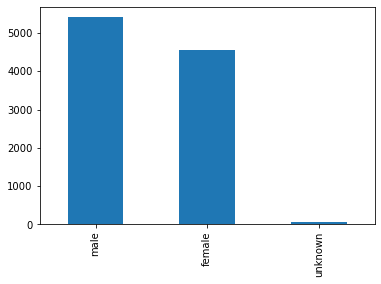

In [17]:
skin_df['sex'].value_counts().plot(kind='bar')

### Step 4:Create Train and Val Sets

In [9]:
skin_df['cell_type_idx'] = pd.Categorical(skin_df['dx']).codes
print(skin_df['cell_type_idx'] .unique())

[2 5 3 4 6 1 0]


In [10]:
target=skin_df['cell_type_idx']

y = to_categorical(target, num_classes = 7)


In [11]:
print(y)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


### Step 5: Preprocessing with Keras

In [21]:
# Import the keras preprocessing method
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
#from keras.applications.xception import preprocess_input

from tensorflow.keras.preprocessing import image
import numpy as np
import os

def get_preprocessed_images(images_directory_list: str, image_size: tuple) -> list:
    images = []
    for img in images_directory_list:
        img = image.load_img(img, target_size=image_size)
        img = image.img_to_array(img)
        img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
        img = preprocess_input(img)
        images.append(img)
    return np.vstack(images)

In [22]:
# Load your images and preprocess them.
image_size = (224,224)
X = get_preprocessed_images(skin_df['path'], image_size)
#print(X.shape, y.shape)

In [23]:

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.15, random_state = 2)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.025, random_state = 2)

In [208]:
#x_train = np.asarray(x_train_o['image'].tolist())
#x_test = np.asarray(x_test_o['image'].tolist())

x_train_mean = np.mean(X_train)
x_train_std = np.std(X_train)

x_val_mean = np.mean(X_val)
x_val_std = np.std(X_val)

x_test_mean = np.mean(X_test)
x_test_std = np.std(X_test)

#X_train = (X_train - x_train_mean)/x_train_std
X_test = (X_test - x_test_mean)/x_test_std
X_val = (X_val - x_val_mean)/x_val_std

In [210]:
X_train = (X_train - x_train_mean)

In [211]:
X_train = (X_train)/x_train_std

In [81]:
print(X_train.shape)
print(y_train.shape)

(8299, 224, 224, 3)
(8299, 7)


### Step 6: Augmentation 

In [24]:
from keras.preprocessing.image import ImageDataGenerator

# Determine the number of generated samples you want per original sample.
datagen_batch_size = 16

# Make a datagenerator object using ImageDataGenerator.
train_datagen = ImageDataGenerator(rotation_range=60,
                                    horizontal_flip=True)

# Feed the generator your train data (use the flow function).
train_generator = train_datagen.flow(X_train, y_train, batch_size=datagen_batch_size)

# Make a datagenerator object using ImageDataGenerator.
validation_datagen = ImageDataGenerator(rotation_range=60,
                                        horizontal_flip=True)

# Feed the generator your validation data (use the flow function).
validation_generator = validation_datagen.flow(X_val, y_val, batch_size=datagen_batch_size)

### Step 7: Training with MobileNet

In [ ]:
# Import your chosen model!
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

# Make a model object. 
# Make sure you exclude the top part. set the input shape of the model to 224x224 pixels, with 3 color channels.
model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze the imported layers so they cannot be retrained.
for layer in model.layers:
    layer.trainable = False
    
model.summary()

### Xception

In [ ]:
from keras.applications.xception import Xception, preprocess_input
model = Xception(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze the imported layers so they cannot be retrained.
for layer in model.layers:
    layer.trainable = False
    
model.summary()

### Resnet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
# Make a model object. 
# Make sure you exclude the top part. set the input shape of the model to 224x224 pixels, with 3 color channels.
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze the imported layers so they cannot be retrained.
for layer in model.layers:
    layer.trainable = False
    
model.summary()

In [26]:
from keras import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

# Add new classifier layers. Make sure our your model will only classify 7 classes!
new_model = Sequential()
new_model.add(model)
new_model.add(Flatten())
new_model.add(Dense(512, activation='relu'))
new_model.add(Dropout(0.3))
new_model.add(Dense(7, activation='softmax'))

# Summarize
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 62720)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               32113152  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 34,374,727
Trainable params: 32,116,743
Non-trainable params: 2,257,984
__________________________________

In [42]:
new_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
history = new_model.fit(train_generator,
                        epochs=8, 
                        batch_size=4,
                        validation_data=validation_generator
                       )

Epoch 1/8
519/519 [==============================] - 245s 468ms/step - loss: 0.6078 - accuracy: 0.7755 - val_loss: 1.1345 - val_accuracy: 0.7512
Epoch 2/8
519/519 [==============================] - 244s 470ms/step - loss: 0.5870 - accuracy: 0.7749 - val_loss: 0.9147 - val_accuracy: 0.7418
Epoch 3/8
519/519 [==============================] - 243s 469ms/step - loss: 0.5825 - accuracy: 0.7779 - val_loss: 0.9319 - val_accuracy: 0.7371
Epoch 4/8
519/519 [==============================] - 242s 466ms/step - loss: 0.5856 - accuracy: 0.7819 - val_loss: 0.7388 - val_accuracy: 0.7465
Epoch 5/8
519/519 [==============================] - 243s 468ms/step - loss: 0.5854 - accuracy: 0.7813 - val_loss: 0.8463 - val_accuracy: 0.7418
Epoch 6/8
519/519 [==============================] - 242s 466ms/step - loss: 0.5731 - accuracy: 0.7796 - val_loss: 0.8470 - val_accuracy: 0.7512
Epoch 7/8
519/519 [==============================] - 247s 475ms/step - loss: 0.5712 - accuracy: 0.7814 - val_loss: 0.8076 - val_ac

In [177]:
#import pickle
#pickle.dump(new_model, open('model_dropout0.3_512_Epoch10_mobile.pkl','wb'))

#model = pickle.load(open('./model/model1.pkl', 'rb'))
new_model.save('model2.h5')

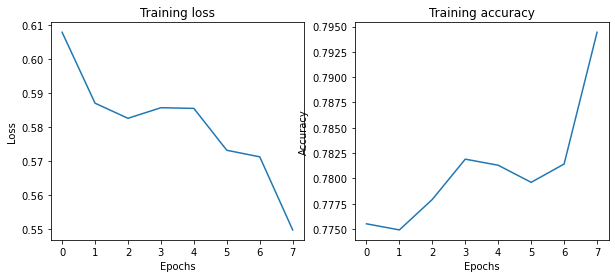

In [43]:
loss = history.history['loss']
accuracy = history.history['accuracy']
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
axs[0].plot(range(len(loss)), loss)
axs[0].set(xlabel="Epochs", ylabel="Loss", title="Training loss")
axs[1].plot(range(len(accuracy)), accuracy)
axs[1].set(xlabel="Epochs", ylabel="Accuracy", title="Training accuracy")
plt.show()

### Step 8: Visualization of Loss and Accuracy

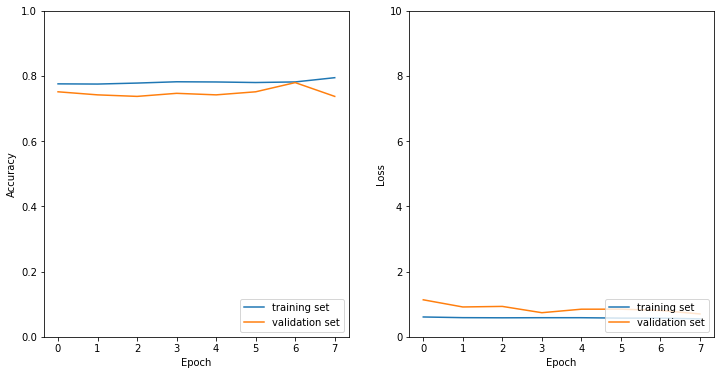

In [44]:
import tensorflow

def plot_history(history : tensorflow.keras.callbacks.History):
    """ This helper function takes the tensorflow.python.keras.callbacks.History
    that is output from your `fit` method to plot the loss and accuracy of
    the training and validation set.
    """
    fig, axs = plt.subplots(1,2, figsize=(12,6))
    axs[0].plot(history.history['accuracy'], label='training set')
    axs[0].plot(history.history['val_accuracy'], label = 'validation set')
    axs[0].set(xlabel = 'Epoch', ylabel='Accuracy', ylim=[0, 1])

    axs[1].plot(history.history['loss'], label='training set')
    axs[1].plot(history.history['val_loss'], label = 'validation set')
    axs[1].set(xlabel = 'Epoch', ylabel='Loss', ylim=[0, 10])
    
    axs[0].legend(loc='lower right')
    axs[1].legend(loc='lower right')
    
plot_history(history)

In [31]:
skin_df['path'][1]

'F:/Be.code/full/full_data_mole/ISIC_0025030.jpg'

In [32]:
# Predict the class of your picture.
image_size = (224,224)
img = image.load_img(skin_df['path'][1], target_size=image_size)
img = image.img_to_array(img)
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
img = preprocess_input(img)

prediction = new_model.predict(img)
print(prediction)

[[2.4184303e-02 9.5750047e-03 2.8026170e-01 1.9883853e-03 3.5338068e-01
  3.3051872e-01 9.1157141e-05]]


### Evaluation Test

In [45]:
# TO COMPLETE: Evaluate the model on the test set.
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = new_model.evaluate(X_test, y_test, batch_size=1)
print("test loss, test acc:", results)


Evaluate on test data
1503/1503 [==============================] - 91s 60ms/step - loss: 0.8027 - accuracy: 0.7399
test loss, test acc: [0.80268394947052, 0.7398536205291748]


### Prediction

In [34]:
# Generate predictions (probabilities -- the output of the last layer)
predictions = new_model.predict(X_test)



In [35]:
y_pred = np.argmax(predictions, axis=1)
print(y_pred.shape)
print(y_pred)

(1503,)
[2 5 5 ... 4 5 5]


In [37]:
y_test_dec = np.argmax(y_test, axis=1)
print(y_test_dec)

[3 5 5 ... 5 5 5]


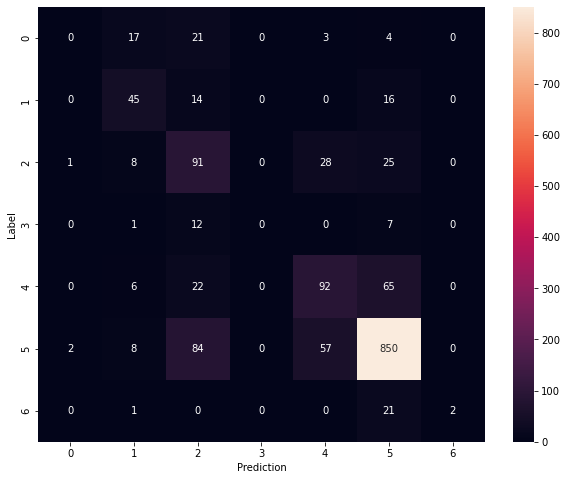

In [38]:
#y_pred = np.argmax(predictions, axis=1) # Predictions
 # Ground truth

# Display Confusion Matrix:
confusion_mtx = tensorflow.math.confusion_matrix(y_test_dec, y_pred) 
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, 
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()